## Importamos todas las librerias a usar

In [91]:
import numpy as np
import h5py
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
import cv2
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
import numpy as np

warnings.filterwarnings('ignore', category=UserWarning)



## Cargamos los datos

In [92]:

def load_data(h5_filepath):
    with h5py.File(h5_filepath, 'r') as hf:
        X = hf['X'][:]
        Y = np.array([cadena.decode('utf-8')for cadena in hf['Y'][:]])
    return X, Y

X, y = load_data('./datos.h5')
print("Shape de X cargado:", X.shape)
print("Shape de Y cargado:", y.shape)

Shape de X cargado: (12400, 42)
Shape de Y cargado: (12400,)


In [93]:
y

array(['1', '1', '1', ..., '_', '_', '_'], dtype='<U12')

In [94]:
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(y)


In [95]:
Y

array([ 0,  0,  0, ..., 30, 30, 30], dtype=int64)

## Dividimos datos de entrenamiento y prueba

In [96]:

# Primera división: Dividir en conjunto de entrenamiento+validación y conjunto de prueba (90%-10%)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# Segunda división: Del 80% restante, dividir en entrenamiento y validación (90% entrenamiento, 10% validación)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.11, random_state=42)

In [97]:
X_train.shape

(9932, 42)

In [98]:
X_val.shape

(1228, 42)

In [99]:
X_test.shape

(1240, 42)

## Entrenamiento

### Curva de Precisión (Accuracy)

- Muestra cómo evoluciona la precisión del modelo durante el proceso de entrenamiento y validación a lo largo de las épocas. Al principio (pocas epocas), el modelo tiene una precisión baja porque está empezando a aprender. A medida que las épocas aumentan, la precisión se eleva porque el modelo mejora.
### Curva de Pérdida (Loss)
-  Muestra cómo cambia la pérdida del modelo durante el entrenamiento y validación a lo largo de las épocas. Al principio del entrenamiento, la pérdida es alta, ya que el modelo aún no ha aprendido. A medida que el entrenamiento avanza, la pérdida disminuye, lo cual indica que el modelo está aprendiendo a minimizar el error.

<img src="./img/curvas.jpeg" width="600px"> 

Epoch 1/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1095 - loss: 3.2147 - val_accuracy: 0.4951 - val_loss: 1.6126
Epoch 2/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6405 - loss: 1.2356 - val_accuracy: 0.8355 - val_loss: 0.6499
Epoch 3/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8499 - loss: 0.5596 - val_accuracy: 0.9153 - val_loss: 0.3559
Epoch 4/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9160 - loss: 0.3346 - val_accuracy: 0.9072 - val_loss: 0.3014
Epoch 5/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9364 - loss: 0.2372 - val_accuracy: 0.9536 - val_loss: 0.1725
Epoch 6/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9423 - loss: 0.2007 - val_accuracy: 0.9479 - val_loss: 0.1919
Epoch 7/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9477 - loss: 0.1776 - val_accuracy: 0.9650 - val_loss: 0.1270
Epoch 8/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9548 - loss: 0.1453 - val_accuracy: 0.

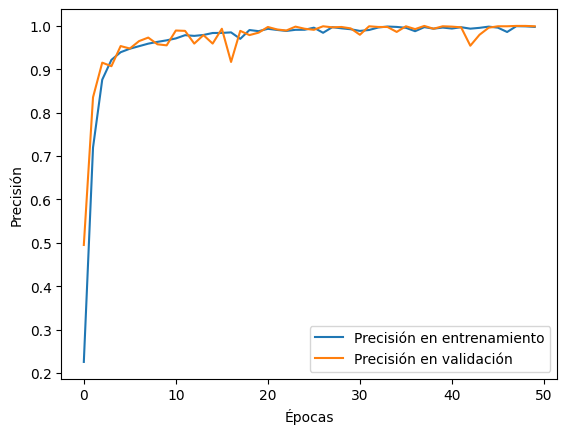

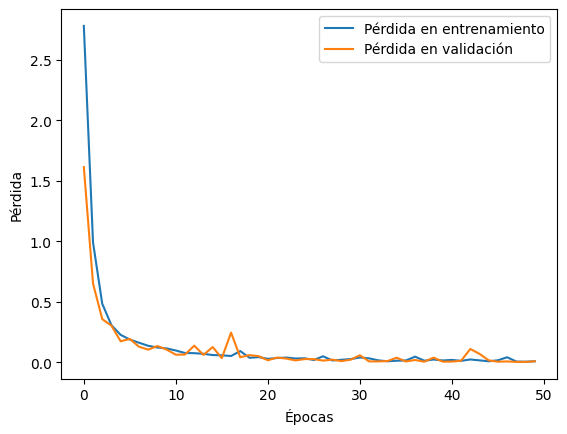

In [100]:


# Número de clases en tu problema
num_classes = len(np.unique(Y)) 

# Definir el modelo
model = Sequential()

# Capa de entrada
model.add(Dense(128, input_dim=X.shape[1], activation='relu'))  # 128 neuronas en la primera capa oculta

# Capas ocultas
model.add(Dense(64, activation='relu'))  # Capa oculta con 64 neuronas
model.add(Dense(32, activation='relu'))  # Capa oculta con 32 neuronas

# Capa de salida: usamos `softmax` para clasificación multiclase
model.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))



# Graficar la precisión
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


In [101]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9990 - loss: 0.0069 
Loss: 0.023475583642721176, Accuracy: 0.9983870983123779


In [102]:
y_pred=[np.argmax(prediccion) for prediccion in model.predict(X_test)]

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [103]:
cf=confusion_matrix(y_test,y_pred)

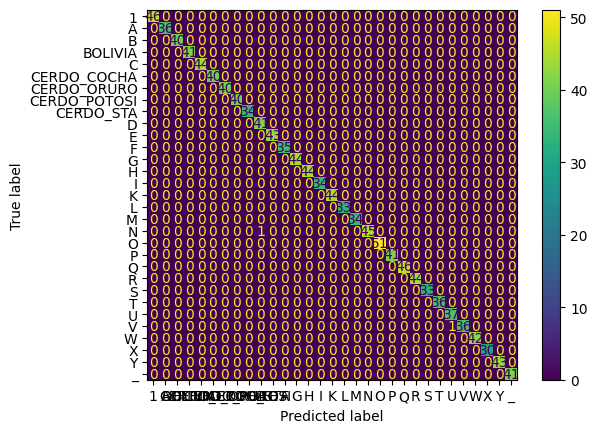

In [104]:
cfd=ConfusionMatrixDisplay(cf,display_labels=label_encoder.classes_)
cfd.plot()

In [105]:
# Guardar el modelo completo
model.save('modelo.keras')
